# Aproximación a la integral por medio de Monte Carlo de la Media Muestral (MC Crudo) con METODOLOGÍA
\begin{equation*}
\begin{aligned}
 I = \int_0^1 \frac{e^{x}-1}{e-1} \quad dx
\end{aligned}
\end{equation*}

### 1. Identifique las variables 

Aquellas cuyo comportamiento define el comportamiento o la evoución global del sistema real.

### 2. Determine la distribución de probabilidad

Elija el tipo de distribución de probabilidad que mejor defina el comportamiento aleatorio de cada una de las variables del sistema identificadas en el paso anterior.

### 3. Modele las variables aleatorias 

Cosntruya un modelo fiel de la aleatoriedad de las variables del sistema. Simular el comportamiento del sistema implica generar muestras aleatorias de cada variable que sigan fielmente la distribución de probabilidad correspondiente.

### 4. Defina el modelo del sistema y los objetivos de la simulación 

Fije los objetivos y diseñe un modelo del sistema real que abstraiga sus propiedades más relevantes. Todo error en el modelo (o su implementación computacional) puede dar lugar a conclusiones equivocadas. 

Antes de experimentar con el modelo, asegurarse de que refleja fielmente el sistema real **validando** el mismo a partir de datos reales, para ello compare los resultados obtenidos de la simulación con los producidos por el sistema.

### 5. Diseñe el experimento

Diseñe un experimento así como las ejecuciones concretas del mismo, los escenarios que desea estudiar para alcanzar los objetivos fijados. El experimento consiste en generar valores de las variables cuyo comportamiento define el comportamiento del sistema y analizar este ante dichos valores.

### 6. Repita el experimento $n$ veces 

Así dispondrá de $n$ observaciones sobre el comportamiento del sistema, lo que permitirá entender su funcionamiento así como evaluar el desempeño del mismo frente a los diversos escenarios establecidos.

El **método Monte Carlo** se basa en la **Ley Fuerte de los Grandes Números** y el **Teorema del Límite Central**.

# Ejercicio

Aproximar el valor del número pi ($\pi$) utilizando Monte Carlo Acierto y Error (Hit or Miss)
1. Analíticamente.
2. Mediante simulación.

# **Analiticamente**
\begin{equation*}
\begin{aligned}
 I = \int_0^1 \frac{e^{x}-1}{e-1} \quad dx
\end{aligned}
\end{equation*}
Resolviendo:
\begin{equation*}
\begin{aligned}
\int_0^1 \frac{e^{x}-1}{e-1} \quad dx &= \frac{1}{e-1} \left[\int_0^1 e^x \quad dx - \int_0^1 1 \quad dx \right]\\ 
&= \frac{1}{e-1} \left(e^x \bigg|_0^1 - x \bigg|_0^1 \right)\\
&= \frac{1}{e-1} \left( e-e^0-1-0 \right)\\
&= \frac{1}{e-1} (e-2)\\
&= \frac{e-2}{e-1}\\
\therefore I &= \frac{e-2}{e-1} \approx 0.418023 \quad \blacksquare
\end{aligned}
\end{equation*}


# **Por simulación: Construimos el modelo en varios pasos.**

**PASO 1**. Defina las variables que intervienen en el modelo.

Definimos $u_i \sim U(0,1)$, como una v.a. uniforme en (0,1) que nos servirá para simular el lanzamiento de un dardo sobre el segmento (0,1)

**PASO 2**. Formule la distribución de probabilidad de cada variable.

$$
f(u_i)= 
\begin{cases} 
1 & \text{si } 0 \leq u_1 \leq 1 \\
0 & \text{en cualquier otro lugar}
\end{cases}
$$


**PASO 3**. Enumere la distribución acumulada de probabilidad de cada variable.

$$
F(u_i) = 
\begin{cases} 
0 & \text{si } u_1 < 0 \\
u_i & \text{si } 0 \leq u_1 \leq 1 \\
1 & \text{si } u_1 > 1
\end{cases}
$$


**PASO 4**. Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

|    Variables |**ui**|
|------|-------|
|Intervalo|     (0,1)   |



**PASO 5**. Genere números aleatorios.

In [2]:
import numpy as np
import random
u = random.uniform(0,1)

**PASO 6**. Simule un lanzamiento de un dardo.

En el método de MC Crudo la simulación del "lanzamiento" de un dardo significa generar un valor $x_i$ de la v.a. 
$$X \sim U(a,b)$$

Luego, el integrando $f(x)$ se evalúa sobre $x_i$.

En este caso $a=0,\ b=1$

**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para 
garantizar la convergencia del resultado.

In [3]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [4]:
def funcion(x): #Definimos la función a la cual le queremos calcular la integral en cierto intervalo.
    return ((math.exp(x)-1)/(math.exp(1)-1))

En esencia el algortimo de Monte Carlo de la Media Muestral es:
\begin{equation*}
\begin{aligned}
 \theta &= \int_0^1 \frac{e^{x}-1}{e-1} \quad dx \\
 \overline{\theta} &= \frac{1}{n} \sum_{i=1}^n f(u_i) \quad \quad \text{en donde  } \quad u_i \sim U(0,1) \quad \text{   i = 1,...,n}
\end{aligned}
\end{equation*}


In [5]:
def experimentos(n): #Definimos una función que realizara 
    aprox = 0 #Contador que ira sumando las evaluaciones de la función en el intervalo de integración N cantidad de veces.
    integral=[] #Guardara las aproximaciones del área bajo la curva de la función.
    ensayos=[]
    band=1
    error = 0.5*(10E-4)
    estabilidad = 0
    
    for i in range(1,n+1):
        aprox = aprox + funcion(random.random()) #Cada vez va sumando la evaluación de la función hasta llegar N cantidad de veces
        ensayos.append(i) #Se va guardando en una lista la iteración i.
        integral.append(aprox/i) #Se va guardadndo la aproximación a la integral en la iteración i.
        
        #CONDICIÓN DE ESTABILIDAD
        dif = abs(integral[i-1] - integral[i - 2])
        if dif < error:
            estabilidad += 1
        else:
            estabilidad = 0
        
        if estabilidad > 10 and band:
            estable = i
            band = 0
        elif not band:
            pass
        else:
            estable = i-1
    return integral,estable #Regresamos una lista de las aproxiamciones al valor de la integral de todas las iteraciones. 
                            #así como el paso "i" en el cual se cumple la condicion de estado estable

In [6]:
exp = experimentos(1500) #Hara el experimento antes descrito 1500 veces, es decir, nos dara 
#1500 aproximaciones a la integral para ver cuando se logra estabilizar.

In [7]:
np.mean(exp[0]) #Saca la media de los experimentos, eso nos dará una idea de la aproximación al valor de la integral.

0.41851086726787806

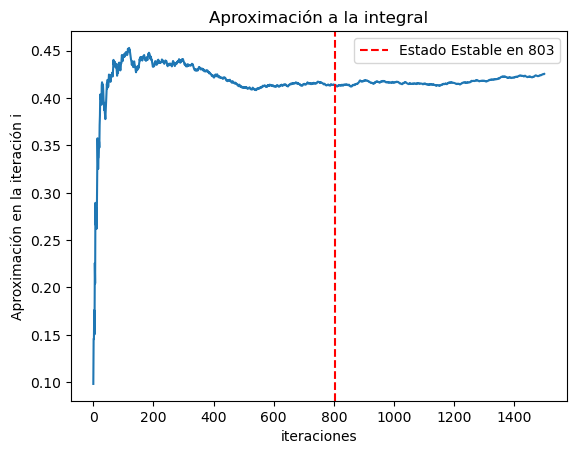

In [8]:
plt.plot(exp[0]) #Grafica la lista de aproximaciones de acuerdo a la cantidad de experimentos realizados.
plt.xlabel('iteraciones')
plt.ylabel('Aproximación en la iteración i')
plt.title('Aproximación a la integral')

# Agrega una línea vertical en la iteración 750 que de manera visual es donde comienza el estado estable.
plt.axvline(x=exp[1], color='red', linestyle='--', label=f'Estado Estable en {exp[1]}')

plt.legend()  # Muestra la leyenda si es necesario
plt.show()


**PASO 8**. Replique el modelo.

In [9]:
def valor(repeticiones): #Esta función hara la simulación anterior muchas veces, es decir, hará "repeticiones" cantidad de veces
    Area = []
    for i in range(repeticiones):
        Area.append(np.mean(experimentos(exp[1])[0])) #Calcula la media de 750 experiementos unas N (repeticiones) cantidad de veces.
    return Area #Nos regresa N (repeticiones) medias de 750 experimentos cada una.

In [11]:
N=100
simulacion = valor(N)

In [12]:
np.mean(simulacion) #Saca la media de las N simulaciones realizadas, eso nos dará una mejor de la aproximación al valor de la integral.

0.4191902821810792

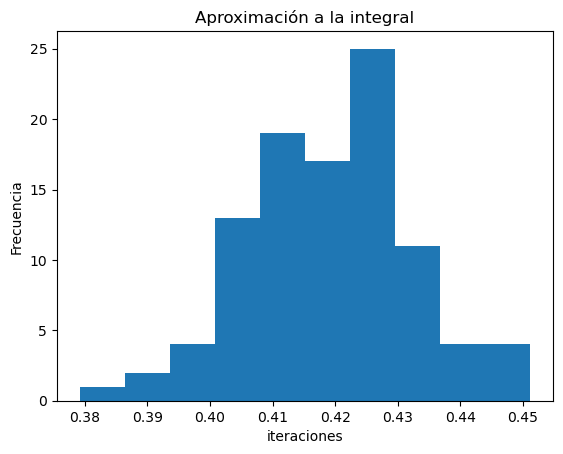

In [14]:
plt.hist(simulacion) #Grafica las frecuencias de la aproximación al valor de la integral de las N simualciones con 750 experiementos cada una.
plt.xlabel('iteraciones')
plt.ylabel('Frecuencia')
plt.title('Aproximación a la integral')
plt.show()

**PASO 9**. Calcule la media del área bajo la curva de la función y su desviación estándar.

In [15]:
media = np.mean(simulacion) #Calcula la media de esas N simulaciones
var = np.var(simulacion) #Calcula la varianza de esas N simulaciones
desv = np.std(simulacion) #Calcula la desvaicion de esas N simulaciones

**PASO 10**. Halle el intervalo de confianza del valor de la integral con un nivel de confianza del $95 \%$.
\begin{equation*}
\overline{x}- Z_{\frac{\alpha}{2}}  \cdot \frac{S}{\sqrt{N}} < \mu < \overline{x}+ Z_{\frac{\alpha}{2}}  \cdot \frac{S}{\sqrt{N}}
\end{equation*}

In [16]:
from scipy.stats import norm #Importamos la libreria para poder obtener el valor de Z.
alpha = 1 - 0.95 #Alpha es igual a 1 - la confianza del intervalo
z_alpha_2 = norm.ppf(1-alpha / 2) #Mandamos a pedir el valor de Z para \alpha/2, sabemos que si es el 95% de confienza, Z esta cercano al 1.96.
l_inferior = media - z_alpha_2 * (desv / math.sqrt(N)) #Sacamos limite inferior por la formula
l_superior = media + z_alpha_2 * (desv / math.sqrt(N)) #Sacamos limite superior por la formula
print("Entonces: ", l_inferior, "< \u03BC <", l_superior) #El intervalo en donde se encuentra el valor real a una confienza del 95%

Entonces:  0.41659344358839634 < μ < 0.421787120773762
